# **Robot Learning – Reinforcement Learning**

The goal of this practical exercise is to implement a Reinforcement Learning algorithm to learn a policy that moves a robot to a goal position. The algorithm is the Q-learning algorithm.

## The Problem
The problem consists in finding the goal in a finite 2D environment that is closed and contains some obstacles.

**States and actions:** The size of the environment is 20x14=280 states. The robot can only do 4 different actions: {←, ↑, →, ↓} (not diagonal movements!). Therefore the size of the Q function will be 280x4=1120 cells.

**Dynamics:** The robot can be located in any free cell (not in the obstacle cells!). The function that describes the dynamics is very simple: the robot will move ONE cell per iteration to the direction of the action that we select, unless there is an obstacle or the wall in front of it, in which case it will
stay in the same position.

**Reinforcement function:** Since the goal is to reach the goal position as fast as possible, the reinforcement function will give -1 in all cells except in the goal cell, where the reward will be +1. The cell that contains the goal is (3,17).

## Data

Next you have the map that will be used as the environment for the Q-learning algorithm:

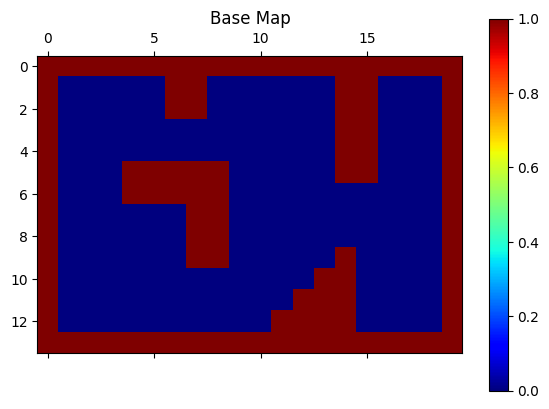

In [1]:
from matplotlib import pyplot as plt
import numpy as np

# Proposed Map
map=[
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1],
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


# Convert Map 2D array to Numpy array
grid_map = np.array(map)

# Show grid map
plt.matshow(grid_map, cmap = "jet")
plt.title('Base Map')
plt.colorbar()


## Algorithm

In order to implement the Q-learning algorithm, you should follow the next pseudocode:

```verbatim
Initialize Q(s,a) to 0 or random
For n episodes:
    Initialize s randomly in any free cell
    repeat:
        Choose action 'a' following epsilon-greedy policy
        Take action a, observe r and s'
        Q(s,a) <- Q(s,a) + alpha * (r + gamma * max_a Q(s',a)) - Q(s,a)
        s <- s'
    until the episode terminates
endFor
```

You will have to set several parameters experimentally: n, m, epsilon, alpha and gamma.

## Environment

In the environment class, you set the possible actions, the rewards obtained depending of those actions and the state of the agent after the action is applied.

You have to fill the empty functions following the previous pseudocode.

In [39]:
class MapEnv:
    def __init__(self, map, goal, max_steps):
        self.map = map
        self.current_state = None
        self.goal = goal.astype(np.int32)
        self.actions = 4
        self.steps = 0
        self.max_steps = max_steps
        if map[goal[0], goal[1]] != 0:
            raise ValueError("Goal position is an obstacle")

    def reset(self):
        # start the agent in a random position within the map and return agent state (cell in which it is)
        self.steps = 0
        free_cells = np.argwhere(self.map == 0)
        if len(free_cells) == 0:
            raise ValueError("Map contains no free cells to place the agent.")
        r = free_cells[np.random.choice(len(free_cells))]

        self.current_state = tuple(r)
        return self.current_state
 

    def step(self, action):
      # this function applies the action taken and returns the obtained state, a reward and a boolean that says if the episode has ended (max steps or goal reached) or not (any other case)
      # action: 0 = up, 1 = down, 2 = left, 3 = right
      ended = False
      reward = -1
      a = [(-1, 0), (1, 0),(0, -1),(0, 1)]

      x,y = self.get_state()
      new_state = self.current_state
      dx,dy = a[action]
      if 0 <= x+dx < self.map.shape[0] and 0 <= y+dy < self.map.shape[1] and self.map[x+dx,y+dy]!=1:
        
        new_state = x+dx,y+dy
        
        if list(new_state) == all(self.goal): 
          reward = 1
          ended = True
        else: reward =-1

      if self.steps == self.max_steps:
        ended =True 
          
      self.current_state = new_state
      self.steps+=1

      return new_state,reward,ended

    def get_state(self):
      # returns current state
      return self.current_state

    def render(self, i=0):
        plt.matshow(self.map, cmap = "jet")
        plt.title('Map')
        plt.colorbar()
        plt.scatter(self.current_state[1], self.current_state[0], c = 'r')
        plt.scatter(self.goal[1], self.goal[0], c = 'g')
        plt.savefig("q_learning_{0:04}.png".format(i), dpi = 300)
        plt.show()



    def render_live(self, i=0, episodic_reward=0, avg_reward=0, save_frames=False, pause_time=0.1):
        if not hasattr(self, 'fig'):   
            self.fig, self.ax = plt.subplots()  # Create figure and axis only once
            self.im = self.ax.imshow(self.map, cmap="jet")  # Display the map
            self.ax.scatter(self.current_state[1], self.current_state[0], c='r')  # Agent
            self.ax.scatter(self.goal[1], self.goal[0], c='g')  # Goal
            plt.ion()  # Enable interactive mode here
        else:
            self.ax.clear()  # Clear the axis to refresh the plot
            self.ax.imshow(self.map, cmap="jet")  # Redraw the map
            self.ax.scatter(self.current_state[1], self.current_state[0], c='r')  # Update agent position
            self.ax.scatter(self.goal[1], self.goal[0], c='g')  # Update goal position

        if episodic_reward is not None:
            self.ax.text(0.05, 0.98, f"Episodic Reward: {int(episodic_reward)}", 
                        transform=self.ax.transAxes, fontsize=10, color="white", 
                        verticalalignment="top", horizontalalignment="left", fontweight='bold')
            self.ax.text(0.65, 0.98, f"Average Reward: {int(avg_reward)}", 
                        transform=self.ax.transAxes, fontsize=10, color="white", 
                        verticalalignment="top", horizontalalignment="left", fontweight='bold')

        if save_frames:
            self.fig.savefig(f"q_learning_{i:04}.png", dpi=300)  # Save frames
        
        plt.draw()  # Redraw the figure
        plt.pause(pause_time)  # Pause to update the plot


## QLearning algorithm

QLearning class creates and trains the policy at every episode using the information provided by the environment. After the training is over, the optimal policy and the value function are obtained.

As in the MapEnv class, you have to fill the empty functions following the previous pseudocode.

In [ ]:

import tqdm

class QLearning:
    def __init__(self, env, alpha, gamma, epsilon, n_episodes):
        self.avg_reward = 0
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.n_episodes = n_episodes
        self.Q = np.random.rand(env.map.shape[0], env.map.shape[1], env.actions)

    def epsilon_greedy_policy(self, s, epsilon):
        # Epsilon greedy policy (choose a random action with probability epsilon)
        a = None
        r = np.random.rand()
        if r<=epsilon: a = np.random.choice(range(self.env.actions))
        else: a = np.argmax(self.Q[s]) #a = np.max(self.Q)
        return a
    
    def episode(self, alpha, epsilon):
        # Episode execution. Generate an action with epsilon_greedy_policy, call step, appy learning function
        # This function should return the total reward obtained in this episode
        # ...
        a = None
        episodic_reward = 0
        self.env.current_state= self.env.reset()
        prev_state = self.env.get_state()
        for step in range(self.env.max_steps):
            a = self.epsilon_greedy_policy(prev_state,epsilon)
            new_state,reward,ended = self.env.step(a)
            self.Q[prev_state[0],prev_state[1],a] =  self.Q[prev_state[0],prev_state[1],a] + \
                alpha*(reward+self.gamma*np.max(self.Q[new_state[0],new_state[1],:]))-self.Q[prev_state[0],prev_state[1],a]
            # print("prev_state",prev_state,"action:",a," next_state:",new_state)
            prev_state = new_state
            episodic_reward+=reward
            # print("epi_reward:",episodic_reward)
            self.env.render_live(episodic_reward=episodic_reward,avg_reward=self.avg_reward)
            if ended:
                break
        
        return episodic_reward

    def train(self, n_episodes, check_every_n=100):
        """Execute n_episodes and every `check_every_n` episodes print the average reward and store it.
           As the initial position is random, this number will not be super stable..."""
        reward = []
        for eps in tqdm.tqdm(range(n_episodes)):
            r = self.episode(self.alpha,self.epsilon)
            if eps%check_every_n==0:
                reward.append(r)
                self.avg_reward=sum(reward)/len(reward)
                # print("Average Reward:",sum(reward)/len(reward))
        print("Average Reward:",sum(reward)/len(reward))

        def test_episode(policy):
                # Episode execution. Generate an action with epsilon_greedy_policy, call step, appy learning function
                # This function should return the total reward obtained in this episode
                # ...
                a = None
                episodic_reward = 0
                self.env.current_state= self.env.reset()
                prev_state = self.env.get_state()
                for step in range(self.env.max_steps): 
                    a = policy()
                    new_state,reward,ended = self.env.step(a)
                    prev_state = new_state
                    episodic_reward+=reward
                    # print("epi_reward:",episodic_reward)
                    self.env.render_live(episodic_reward=episodic_reward,avg_reward=self.avg_reward)
                    if ended:
                        break

    def get_optimal_policy(self):
        """Once training is done, retrieve the optimal policy from Q(s,a)."""
        policy = {}
        states = np.argwhere(self.env.map == 0)
        for s in states:
            opt_a = np.argmax(self.Q[s[0],s[1],:]) #in a particlar state check for best action
            policy[s[0],s[1]]=opt_a
        return policy

    def value_function(self):
        """Once training is done, retrieve the optimal value function from from Q(s,a)"""
        v = np.max(self.Q, axis = 2)
        v[self.env.map == 1] = -np.inf
        return v


## Training

For the training you need to choose some parameters experimentally. Test different values to see how the training results change.

Parameters:

* **alpha**: learning rate of the algorithm
* **gamma**: discount factor of the algorithm
* **epsilon**: random action probability
* **n_episodes**: number of episode repetitions
* **max_steps**: maximum number of iterations per episode (in Environment class)

  0%|          | 0/100 [00:00<?, ?it/s]

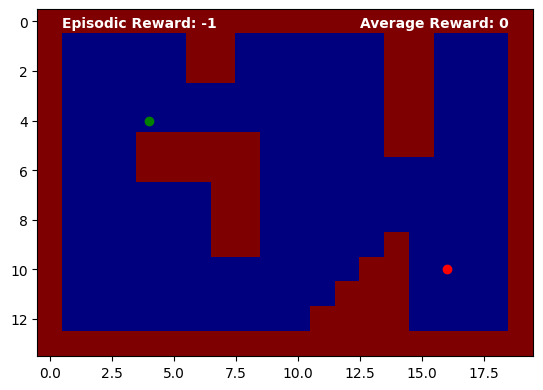

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

  1%|          | 1/100 [00:03<06:30,  3.94s/it]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

  1%|          | 1/100 [00:07<12:05,  7.33s/it]


KeyboardInterrupt: 

In [42]:
# Create an environment and a QLearning agent to learn it. Plot the averaged rewards stored.
# print(np.shape(grid_map))
# Create an environment and a QLearning agent to learn it. Plot the averaged rewards stored.
eps=100
eps_steps =30
env = MapEnv(map=grid_map, goal=np.array([4, 4]), max_steps=eps_steps)
agent = QLearning(env, alpha=0.01, gamma=0.95, epsilon=0.5, n_episodes=eps,)
agent.train(n_episodes=eps, check_every_n=eps/4)
optimal_policy = agent.get_optimal_policy()
optimal_value = agent.value_function()


## Plot value function and optimal policy

In [ ]:
# Plot the value function (see included figure)
plt.subplot(1, 2, 1)
plt.imshow(value_function, cmap="viridis", interpolation="nearest")
plt.colorbar(label="Value (V(s))")
plt.title("Value Function")
plt.xlabel("State (Column)")
plt.ylabel("State (Row)")

# Plot policy (see included figure)
plt.subplot(1, 2, 2)
plt.imshow(optimal_policy, cmap="Blues", interpolation="nearest")
plt.colorbar(label="Action")
plt.title("Optimal Policy")
plt.xlabel("State (Column)")
plt.ylabel("State (Row)")

plt.tight_layout()
plt.show()

## Test current Policy

Once the training is over, we can see what the robot has learnt to do. You can test it with other goal positions and other maps, to see of the policy is able to adapt to other situations.

In [ ]:
# generate an animation with the agent solving the maze



test_episode()


## Other environemnts

Create a new map (min size 15 x 15).

Answer:

* The policy you have just learned is able to solve this map?
* If not, the algorithm you have implemented is able to learn a new policy to solve this map? Demonstrate one or the other

## Submission

You must deliver this Python Interactive Notebook. The file must have the name q_learning_YOUR_NAME.ipynb. Also, you must do a report commenting the problems you encountered, a discussion on how the parameters affect the training and conclusions for the results obtained.

Make sure that all cells can be executed.